Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



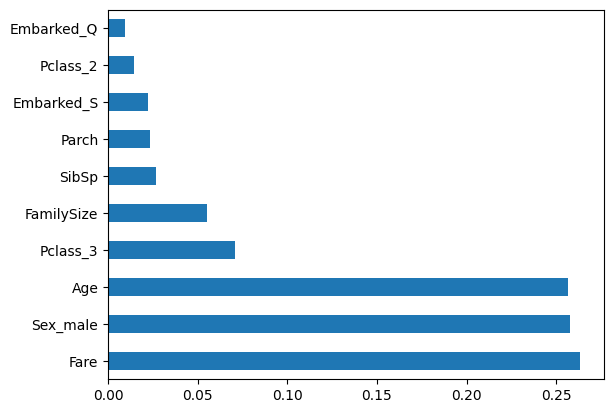

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
titanic = pd.read_csv("data/titanic/train.csv")
titanic_test = pd.read_csv("data/titanic/train.csv")

# Exploratory Data Analysis (EDA)
# print(titanic.head())
# print(titanic.info())
# print(titanic.describe())

# Data Cleaning and Feature Engineering
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0], inplace=True)
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

# One-hot encoding for categorical variables
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)


# Split the data into training and testing sets
X_train = titanic.drop('Survived', axis=1)
y_train = titanic['Survived']

X_test = titanic_test.drop('Survived', axis=1)
y_test = titanic_test['Survived']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Feature Importances
feature_importances = pd.Series(model.feature_importances_, index=titanic.drop('Survived', axis=1).columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
